In [2]:
import pandas as pd

In [3]:
videos = pd.read_csv("./data/video-stats.csv")
videos.head()

,Id,Year,Month,Day,VideoDuration,VideoWeight
0,00114ad1-489d-47dd-a536-4b8d77283b1a,2023,4,1,01:12,14113329
1,015e8561-1087-442e-a71e-43c8b6fdcd75,2023,4,1,01:12,16577519
2,00a36156-5807-4c0c-abb7-d2e931505f2f,2023,4,1,01:05,12968662
3,0275a006-5bc5-4450-874b-c8cccf9c72a7,2023,4,1,01:27,11022998
4,0267da8d-1a84-4e46-ad72-c94fc2b89c8f,2023,4,1,01:19,33007044


In [4]:
videos['TimeSplitted'] = videos['VideoDuration'].str.split(':')
videos.head(5)

,Id,Year,Month,Day,VideoDuration,VideoWeight,TimeSplitted
0,00114ad1-489d-47dd-a536-4b8d77283b1a,2023,4,1,01:12,14113329,"[01, 12]"
1,015e8561-1087-442e-a71e-43c8b6fdcd75,2023,4,1,01:12,16577519,"[01, 12]"
2,00a36156-5807-4c0c-abb7-d2e931505f2f,2023,4,1,01:05,12968662,"[01, 05]"
3,0275a006-5bc5-4450-874b-c8cccf9c72a7,2023,4,1,01:27,11022998,"[01, 27]"
4,0267da8d-1a84-4e46-ad72-c94fc2b89c8f,2023,4,1,01:19,33007044,"[01, 19]"


In [5]:
def getMinutes(duration):
        if len(duration) == 2:
            return duration[0]
        else:
            return duration[0] * 60 + duration[1] if duration[0] == 00 else duration[1]

In [6]:
videos['OfficialDuration'] = videos['TimeSplitted'].apply(getMinutes)
videos

,Id,Year,Month,Day,VideoDuration,VideoWeight,TimeSplitted,OfficialDuration
0,00114ad1-489d-47dd-a536-4b8d77283b1a,2023,4,1,01:12,14113329,"[01, 12]",01
1,015e8561-1087-442e-a71e-43c8b6fdcd75,2023,4,1,01:12,16577519,"[01, 12]",01
2,00a36156-5807-4c0c-abb7-d2e931505f2f,2023,4,1,01:05,12968662,"[01, 05]",01
3,0275a006-5bc5-4450-874b-c8cccf9c72a7,2023,4,1,01:27,11022998,"[01, 27]",01
4,0267da8d-1a84-4e46-ad72-c94fc2b89c8f,2023,4,1,01:19,33007044,"[01, 19]",01
...,...,...,...,...,...,...,...,...
76699,fc8c1578-d6f8-4e8f-adac-400b73638298,2023,6,27,00:01:53,51393004,"[00, 01, 53]",01
76700,fca9b20c-3de1-4ba2-a799-19dbfe1bc56d,2023,6,27,00:01:52,24982337,"[00, 01, 52]",01
76701,fec52545-4b5c-4f5c-8193-11762d2cd124,2023,6,27,00:01:59,17328011,"[00, 01, 59]",01
76702,febd9727-8120-44ae-ba14-ce365a461692,2023,6,27,00:03:10,86066302,"[00, 03, 10]",03


In [7]:
videos.to_csv("./data/video-stats-cleaned.csv",index=False)

## Visualization

In [8]:
video_stats = pd.read_csv("./data/video-stats-cleaned.csv")

In [9]:
video_stats.head()

,Id,Year,Month,Day,VideoDuration,VideoWeight,TimeSplitted,OfficialDuration
0,00114ad1-489d-47dd-a536-4b8d77283b1a,2023,4,1,01:12,14113329,"['01', '12']",1
1,015e8561-1087-442e-a71e-43c8b6fdcd75,2023,4,1,01:12,16577519,"['01', '12']",1
2,00a36156-5807-4c0c-abb7-d2e931505f2f,2023,4,1,01:05,12968662,"['01', '05']",1
3,0275a006-5bc5-4450-874b-c8cccf9c72a7,2023,4,1,01:27,11022998,"['01', '27']",1
4,0267da8d-1a84-4e46-ad72-c94fc2b89c8f,2023,4,1,01:19,33007044,"['01', '19']",1


<Axes: xlabel='Month', ylabel='VideoWeight'>

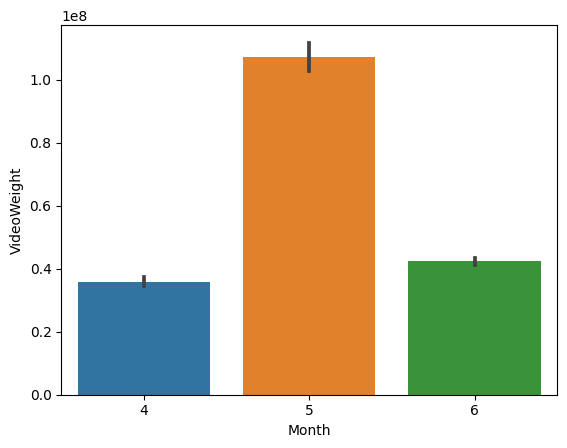

In [11]:
import seaborn as sns
sns.barplot(data=video_stats, x="Month", y="VideoWeight")